# <center> Customer Churn Prediction — EDA</center>

This notebook analyzes data from a telecommunications company to identify patterns in customer churn (`Churn`).

We will examine demographic and behavioral attributes to understand: **who is churning and why**.

**Target variable:** `Churn`
Problem type: **binary classification**

## 🔍 Objective:
Build a classification model that predicts whether a customer will churn (`Churn = Yes`) or not (`Churn = No`).

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
sns.set_style("whitegrid")
sns.set_palette(["#d38b8b", "#b0cde6"])  

In [2]:
#  Load dataset

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📋 Data overview

Let's take a look at the structure and types of the data.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


💡 **Note**:  
Most features are stored as `object`, even numerical-looking fields like `TotalCharges`.  

Some values in `TotalCharges` were strings, possibly due to spaces. We'll need to convert them to `float` and remove lines with missing ones.

In [4]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges couldn't be converted
print("Missing values in TotalCharges:", df['TotalCharges'].isna().sum())
df = df.dropna(subset=['TotalCharges'])

# Reset index after drop
df.reset_index(drop=True, inplace=True)

Missing values in TotalCharges: 11


<u>Now the dataset is clean and ready for analysis.</u>

Let's look at summary statistics. 

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## 📊 Summary Statistics

- `SeniorCitizen` is binary (0 = not senior, 1 = senior)
- `tenure` ranges from 1 to 72 months
- `MonthlyCharges` range from \$18.25 to \$118.75
- `TotalCharges` correlates with `tenure` × `MonthlyCharges`

The typical customer has been with the company **~32 months**, pays around **\$65/month**, and has spent about **\$2,200** in total.


## Missing values check
We ensure there are no remaining missing values before proceeding.


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 <u>No missing values detected. Dataset is ready for EDA. </u>

## 🎯 Target Variable Distribution

Let's check the balance of our target variable: **Churn**.


In [7]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

We have:
- `No` churn: 5,174 customers
- `Yes` churn: 1,869 customers

That’s ~26.6% churn rate, indicating a **moderately imbalanced dataset**.
We'll keep this in mind during model training and evaluation.


## Churn by Gender

Let's examine the distribution of churn by gender.


In [8]:
df[['Churn', 'gender']].value_counts().unstack()

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


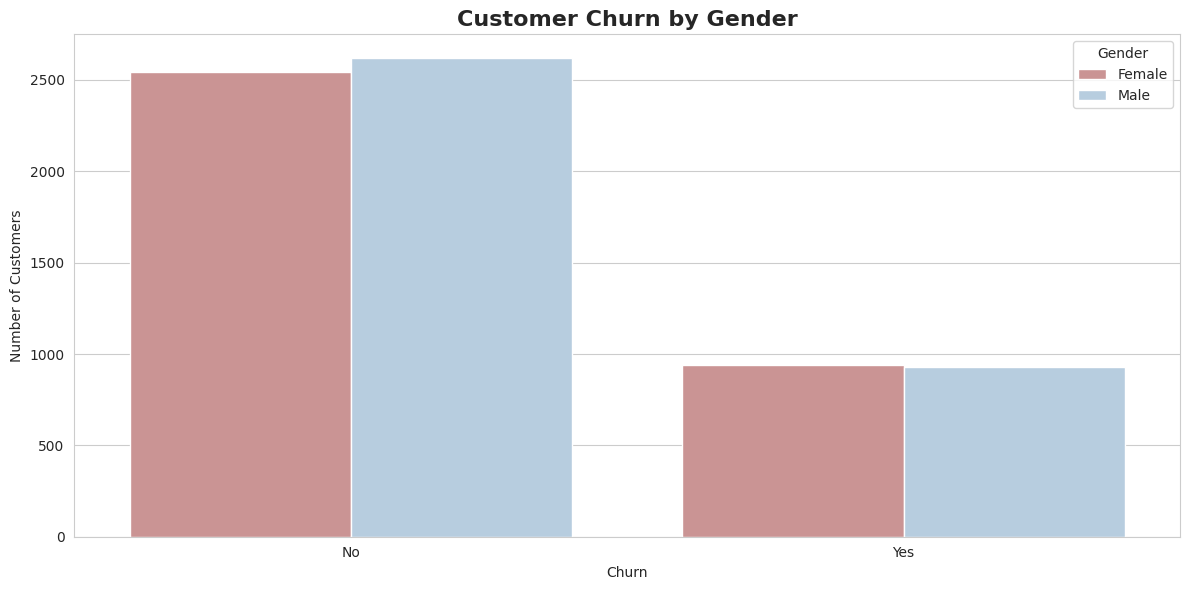

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Customer Churn by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


**Observation**:
- Churn rate fairly similar between genders.
- Therefore, gender alone may not be a strong predictor of churn.


## 📦 Churn Rate by Contract Type and Gender

Let's see how churn rate varies based on the contract customers have.


In [10]:
df[['Contract', 'gender']].value_counts().unstack()

gender,Female,Male
Contract,,
Month-to-month,1925,1950
One year,718,754
Two year,840,845


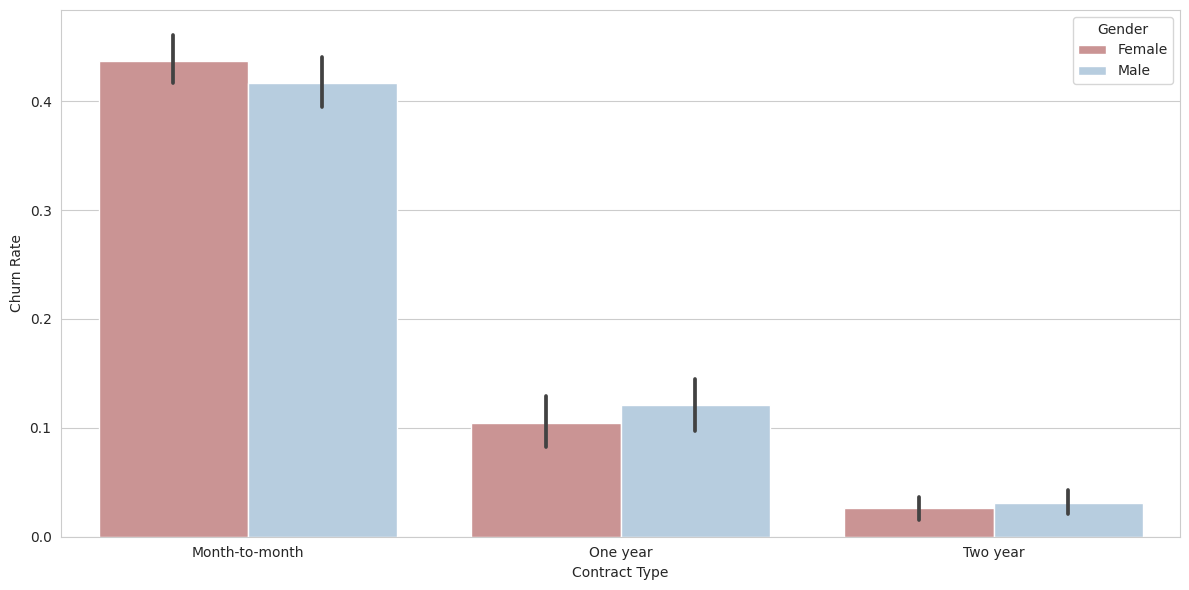

In [11]:
df_plot = df.copy()
 
df_plot['Churn'] = df_plot['Churn'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(12, 6))
sns.barplot(x='Contract', y='Churn', hue='gender', data=df_plot)
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

💡 **Insight**:
- Customers with **month-to-month contracts** have much higher churn rates.
- **Longer-term contracts (1 or 2 years)** reduce churn significantly.
- This suggests that contract length could be a strong retention lever.


## Tenure vs Churn

How long customers have been with the company also likely impacts churn.


In [12]:
df[['tenure', 'Churn']].value_counts().unstack().head(5)


Churn,No,Yes
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64


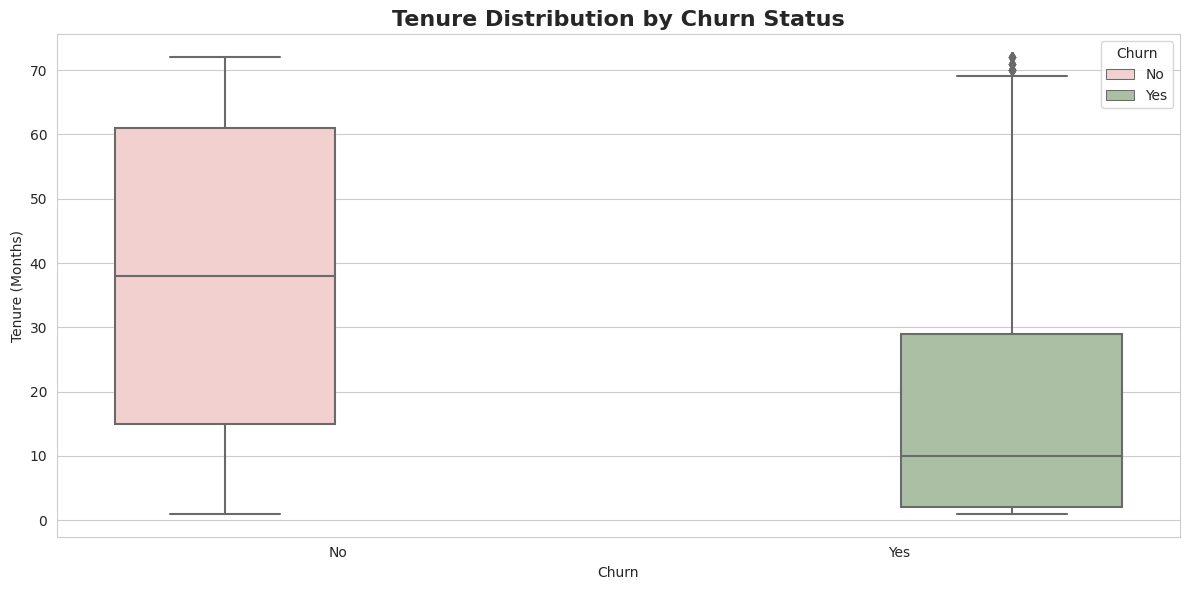

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', hue='Churn', data=df, palette=["#f7cac9", "#a8c3a0"])
plt.title('Tenure Distribution by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.tight_layout()
plt.show()


💡 **Insight**:
- Churning customers tend to have **much shorter tenures**.
- Those who stay beyond the first ~12 months are less likely to churn.


## 💰 Monthly Charges vs Churn

Is there a link between how much a customer pays and their likelihood to churn?


In [14]:
df[['MonthlyCharges', 'Churn']].value_counts().unstack().head(5)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Churn,No,Yes
MonthlyCharges,,
18.25,1.0,NaN
18.40,1.0,NaN
18.55,1.0,NaN
18.70,2.0,NaN
18.75,1.0,NaN


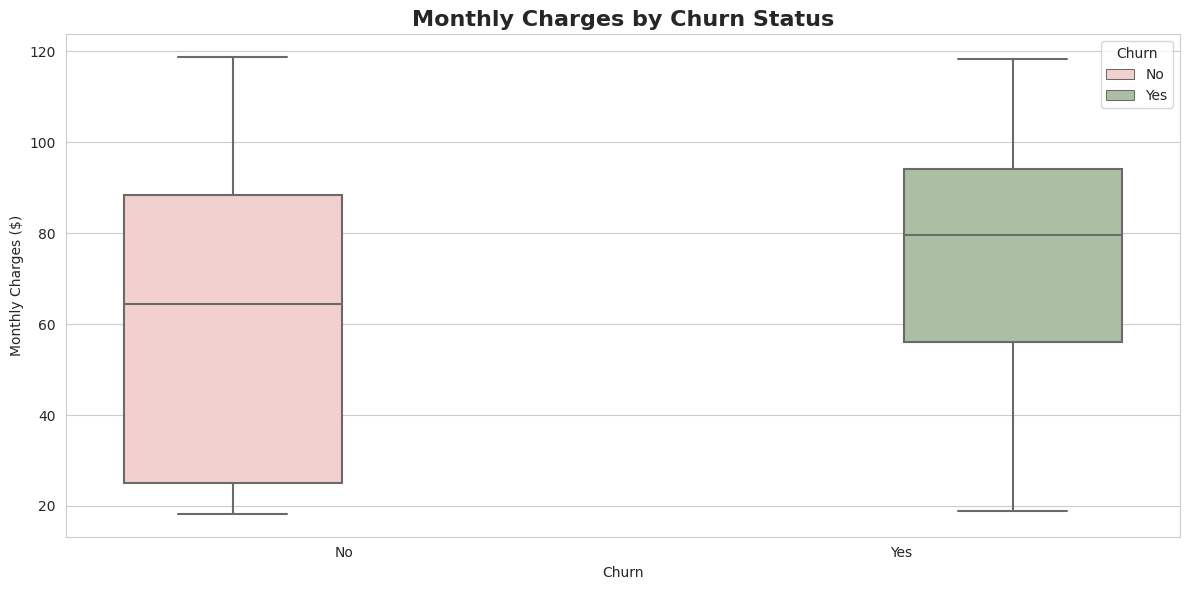

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette=["#f7cac9", "#a8c3a0"])
plt.title('Monthly Charges by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()


💡 **Insight**:
- Customers who churn tend to pay **higher monthly charges**.
- It’s possible that expensive plans lead to dissatisfaction, or are harder to justify.


## Payment Method Distribution by Gender

Which payment methods are preferred by each gender?


In [16]:
df[['PaymentMethod', 'gender']].value_counts().unstack()


gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),787,755
Credit card (automatic),751,770
Electronic check,1170,1195
Mailed check,775,829


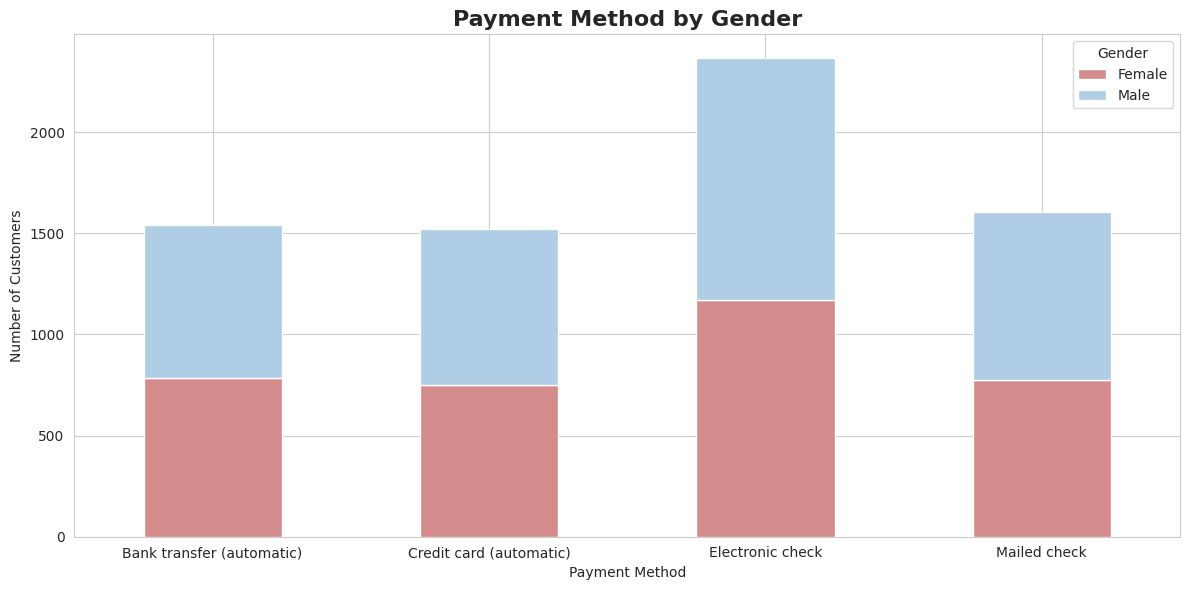

In [17]:
pd.crosstab(df['PaymentMethod'], df['gender']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Payment Method by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


##  Summary of Key Insights

- **Contract type** has a strong relationship with churn - shorter contracts result in more churn.
- **Shorter tenures** and **higher monthly charges** are associated with higher churn.
- **Gender** appears to have little influence on churn directly.
- **Payment method** preferences vary by gender, but impact on churn is less obvious.



<u>Next step: Feature engineering and model training. </u>


---

## Feature Engineering and Model Training

Now that we've explored the dataset and understood the key drivers of churn, it's time to build machine learning models.

We'll start by preprocessing the data:  
- dropping irrelevant columns  
- encoding categorical features  
- scaling numeric features  
- building sklearn Pipelines  
- training 3 classifiers: Logistic Regression, Random Forest, XGBoost  
- evaluating models using accuracy, ROC AUC, and confusion matrix  


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

import json

**Preprocessing**

In [19]:
df = df.drop(columns=['customerID'])
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = df.drop(columns=numeric_features + ['Churn']).columns.tolist()

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

---

## Training ML Models

We will now train and evaluate three models:
- Logistic Regression  
- Random Forest  
- XGBoost  

All models will be wrapped in sklearn Pipelines using the same preprocessing steps.



 Model LogisticRegression trained successfully.

 Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

LogisticRegression — Accuracy: 0.788, ROC AUC: 0.832
Confusion Matrix:
[[916 117]
 [181 193]]

 Model RandomForest trained successfully.

 Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

RandomForest — Accuracy: 0.787, ROC AUC: 0.812
Confusion Matrix:
[[932

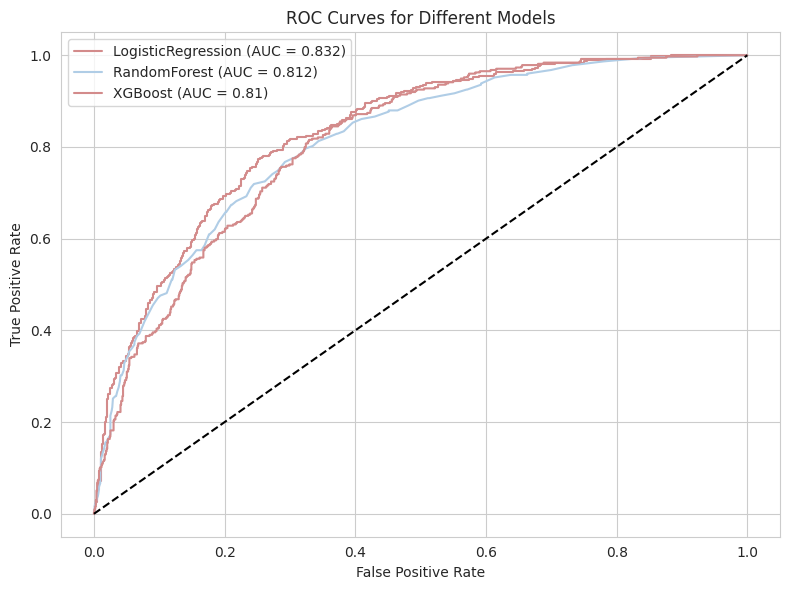

In [20]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}
metrics = {}

plt.figure(figsize=(8, 6))

for name, clf in models.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    model.fit(X_train, y_train)
    print(f"\n Model {name} trained successfully.")

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    acc = round(accuracy_score(y_test, y_pred), 3)
    auc = round(roc_auc_score(y_test, y_prob), 3)

    print(f"{name} — Accuracy: {acc}, ROC AUC: {auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc})")

    results[name] = {
        "pipeline": model,
        "auc": auc,
        "acc": acc
    }

    metrics[name] = {
        "accuracy": acc,
        "roc_auc": auc,
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
    }



plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:

best_model_name = max(results, key=lambda name: results[name]['auc'])
print(f"\n Best model: {best_model_name} with AUC: {results[best_model_name]['auc']}")
best_model = results[best_model_name]['pipeline']


 Best model: LogisticRegression with AUC: 0.832


---

## Confusion Matrices

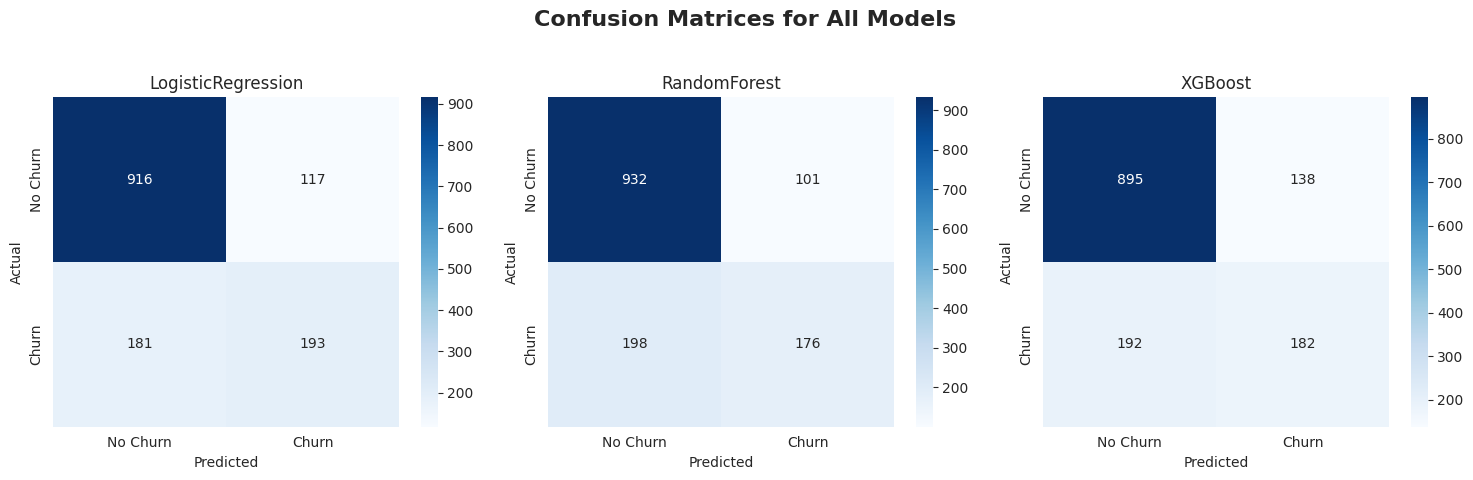

In [22]:
model_names = ["LogisticRegression", "RandomForest", "XGBoost"]
labels = ["No Churn", "Churn"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, name in enumerate(model_names):
    cm = np.array(metrics[name]["confusion_matrix"])
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax,
                xticklabels=labels, yticklabels=labels)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.suptitle("Confusion Matrices for All Models", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
